# Boron Nitride

In [2]:
from pythtb import TBModel, WFArray, Mesh
from pythtb.plotting import plot_bands
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define lattice vectors
lat = [[1, 0], [1/2, np.sqrt(3)/2]]
# define coordinates of orbitals
orb = [[1/3, 1/3], [2/3, 2/3]]

# make two dimensional tight-binding boron nitride model
my_model = TBModel(2, 2, lat, orb)

# set periodic model
delta = 0.4
t = -1.0
my_model.set_onsite([-delta, delta])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])

## `TBModel.cut_piece`

Now we cut out 3 unit cells along second direction with open boundary conditions to make a ribbon model.

In [4]:
model_orig = my_model.cut_piece(3, 1, glue_edgs=False)
print(model_orig)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 6
number of electronic states = 6

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
  # 2 ===> [ 0.333 ,  1.333 ]
  # 3 ===> [ 0.667 ,  1.667 ]
  # 4 ===> [ 0.333 ,  2.333 ]
  # 5 ===> [ 0.667 ,  2.667 ]
Site energies:
  # 0 ===> -0.400 
  # 1 ===>  0.400 
  # 2 ===> -0.400 
  # 3 ===>  0.400 
  # 4 ===> -0.400 
  # 5 ===>  0.400 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 2 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 2 | H | 3 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 3 | H | 2 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 3 

## `TBModel.change_nonperiodic_vector`

Construct and display new model with nonperiodic lattice vector changed to be normal to the periodic direction

In [ ]:
model_perp = model_orig.change_nonperiodic_vector(1, to_home_warning=False)
print(model_perp)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 6
number of electronic states = 6

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [   0   ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.500 ,  0.333 ]
  # 1 ===> [ 1.000 ,  0.667 ]
  # 2 ===> [ 1.000 ,  1.333 ]
  # 3 ===> [ 1.500 ,  1.667 ]
  # 4 ===> [ 1.500 ,  2.333 ]
  # 5 ===> [ 2.000 ,  2.667 ]
Site energies:
  # 0 ===> -0.400 
  # 1 ===>  0.400 
  # 2 ===> -0.400 
  # 3 ===>  0.400 
  # 4 ===> -0.400 
  # 5 ===>  0.400 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 2 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 2 | H | 3 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 3 | H | 2 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 3 

## Bands and Berry phase
  
Solve both models, showing that the band structures are the same, but Berry phases are different

Original model

Berry phase = [-0.4425504]

Revised model

Berry phase = [-7.34788079e-16]



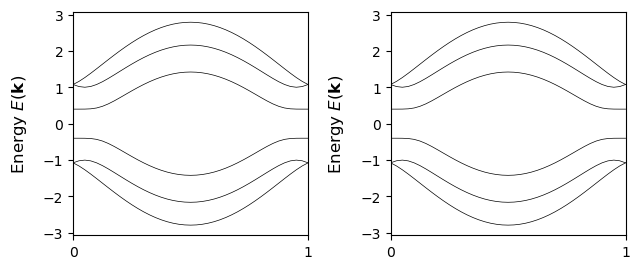

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6.5, 2.8))

def run_model(model, panel):
    numk = 41
    k_nodes = [[-0.5], [0.5]]
    k_vec, _, _ = model.k_path(k_nodes, numk, report=False)

    model.plot_bands(k_path=k_nodes, nk=numk, fig=fig, ax=ax[panel], lc="k", lw=0.5)

    mesh = Mesh(model, path_k=k_vec, n_interp=1)
    wf = WFArray(model, mesh)
    wf.solve_k_mesh()

    n_occ = model.nstate // 2
    berry_phase = wf.berry_phase(range(n_occ), dir=0)
    print(f"Berry phase = {berry_phase}\n")

print("Original model\n")
run_model(model_orig, 0)

print("Revised model\n")
run_model(model_perp, 1)

# save figure
fig.tight_layout()
plt.show()

## Notes

Let x be along the extended direction and y be normal to it.

This model has an $M_x$ mirror symmetry, so the Berry phase is
expected to be $0$ or $\pi$. We find it to be zero, but only after the
'change_nonperiodic_vector' method is used to force the nonperiodic
"lattice vector" to be perpedicular to the extended direction.

The physical meaning of the Berry phase in the original model
calculation is rather subtle. It is related to the position of
the joint Wannier center (i.e., summed over occupied bands) in
the direction of reciprocal lattice vector 0, which has a
$y$ component as well as an $x$ component (since it must be normal
to real space lattice vector 1). The joint Wannier center gets
displaced along $y$ as the hopping $t$ is changed, so the Berry
phase calculation gets "contaminated" by this displacement.